In [42]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [43]:
cost = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
cost

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [64]:
cost1 = cost[cost['charges'] <= 48000]

In [82]:
Cost = cost1[cost1['bmi'] <= 48]

<AxesSubplot:xlabel='age', ylabel='charges'>

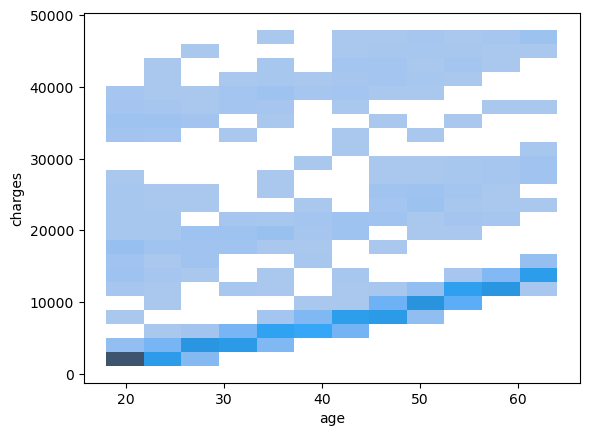

In [83]:
sns.histplot(data = Cost, x='age', y='charges')

In [90]:
convert = pd.get_dummies(Cost[['sex','smoker']], drop_first=True)


In [92]:
cost2 = pd.concat([Cost, convert], axis=1)

In [95]:
cost3 = cost2.drop(['sex','smoker'], axis=1)
cost3['region'] = cost3['region'].map({'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3})

In [96]:
x = cost3.drop(['charges'], axis=1)
y = cost3['charges']


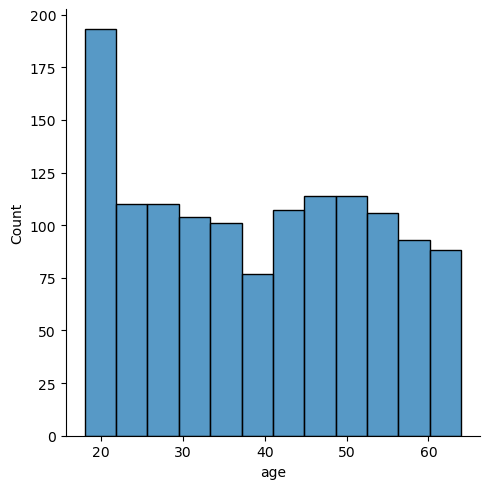

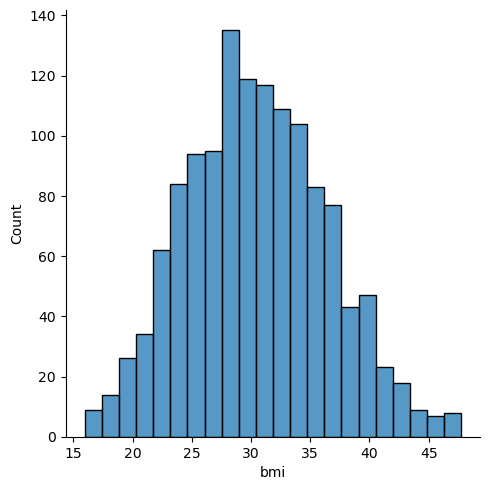

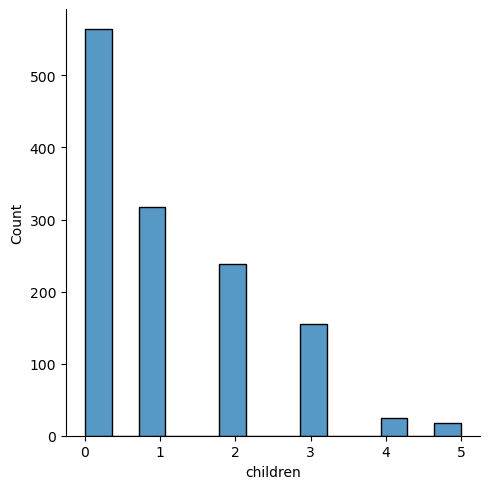

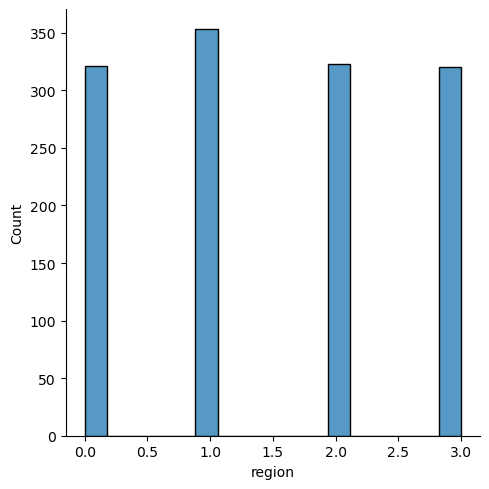

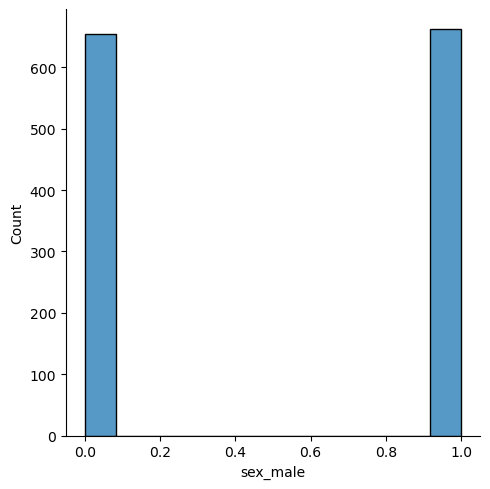

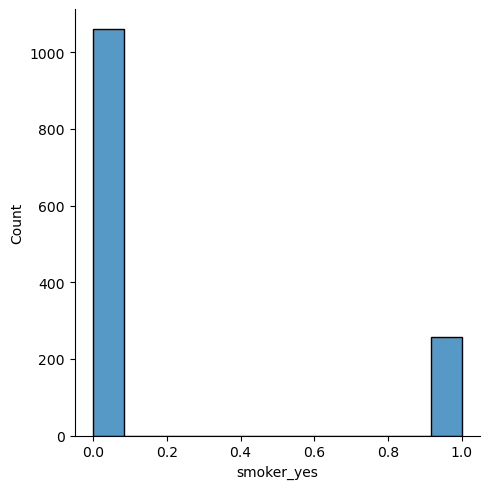

In [97]:
for i in x.columns:
    sns.displot(data = x, x = x[i], kind ='hist')

In [98]:
scale = QuantileTransformer(output_distribution ='normal')

In [99]:
x_scaled = pd.DataFrame(scale.fit_transform(x))

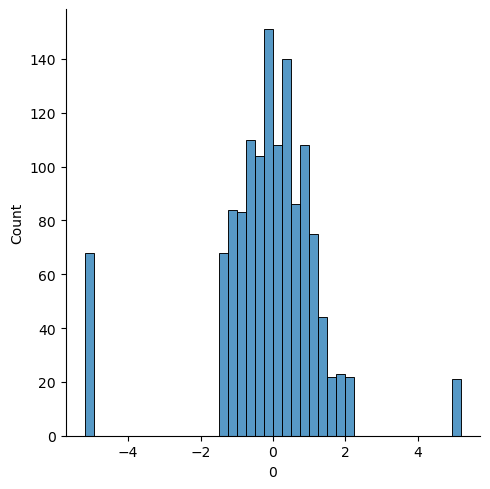

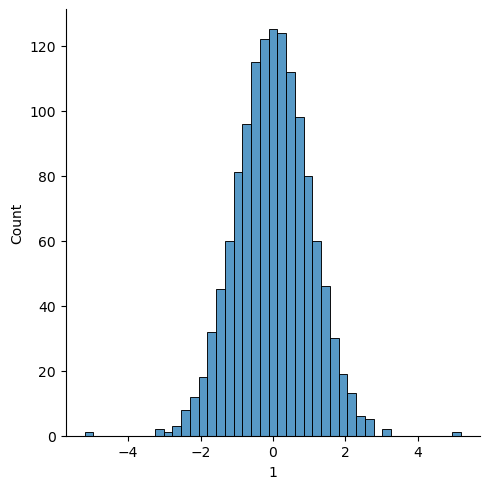

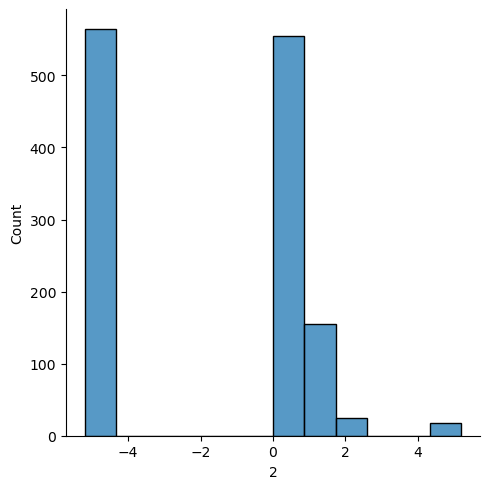

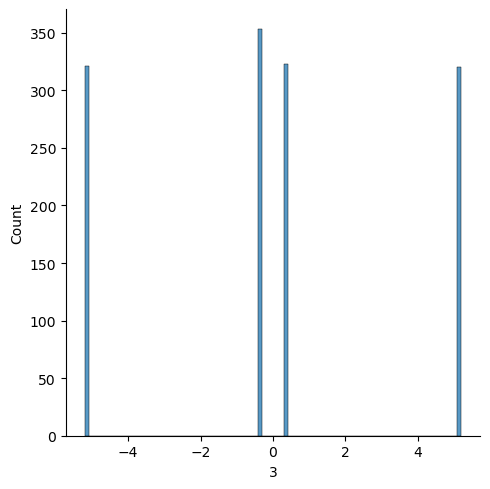

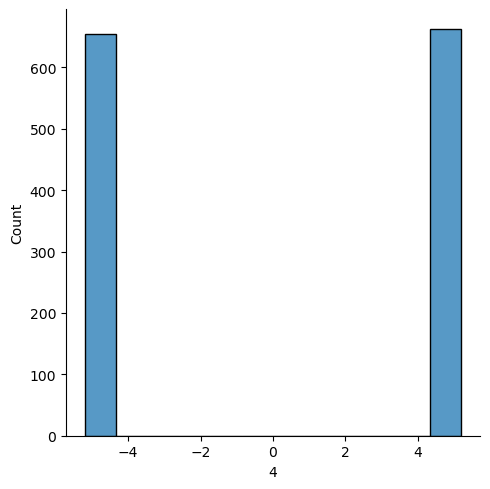

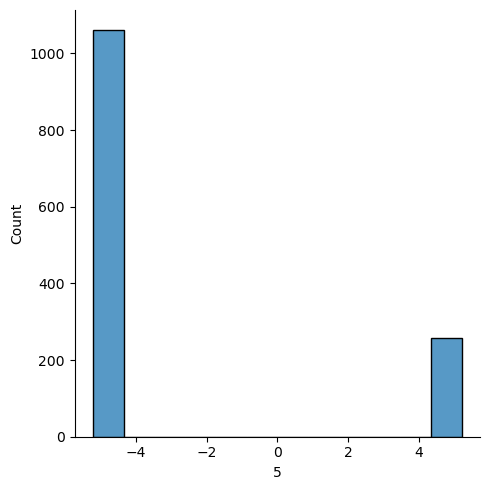

In [100]:
for i in x_scaled.columns:
    sns.displot(data = x_scaled, x = x_scaled[i], kind ='hist')

In [101]:
scaled = RobustScaler()
x_scaled1 = pd.DataFrame(scaled.fit_transform(x_scaled))
x_scaled1

,0,1,2,3,4,5
0,-1.030754,-0.288548,-0.901637,-7.443626,-1.0,10.398675
1,-3.770491,0.421651,0.000000,0.000000,0.0,0.000000
2,-0.413448,0.319395,0.205108,0.000000,0.0,0.000000
3,-0.212612,-0.977376,-0.901637,1.000000,0.0,0.000000
4,-0.250043,-0.167064,-0.901637,1.000000,0.0,0.000000
...,...,...,...,...,...,...
1312,0.443498,0.089079,0.205108,1.000000,0.0,0.000000
1313,-3.770491,0.195774,-0.901637,8.395224,-1.0,0.000000
1314,-3.770491,0.766036,-0.901637,0.000000,-1.0,0.000000
1315,-0.794935,-0.550207,-0.901637,-7.443626,-1.0,0.000000


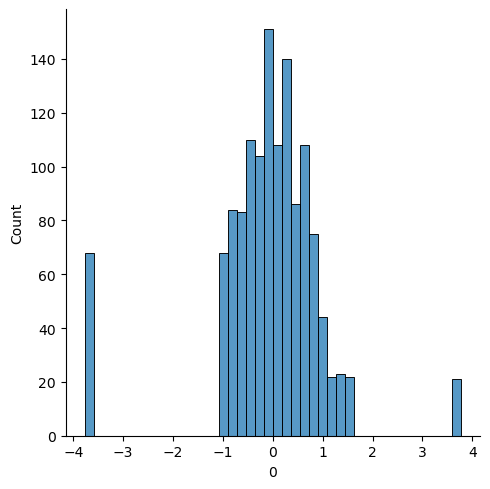

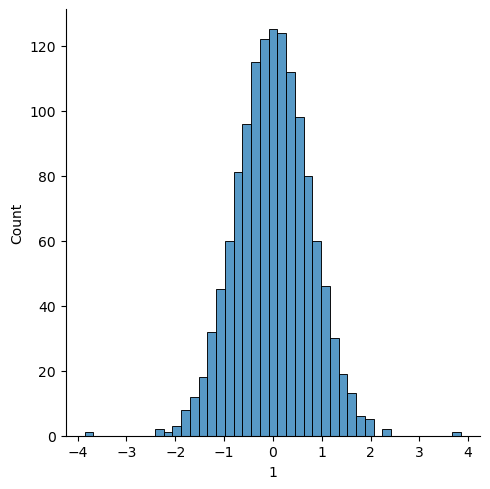

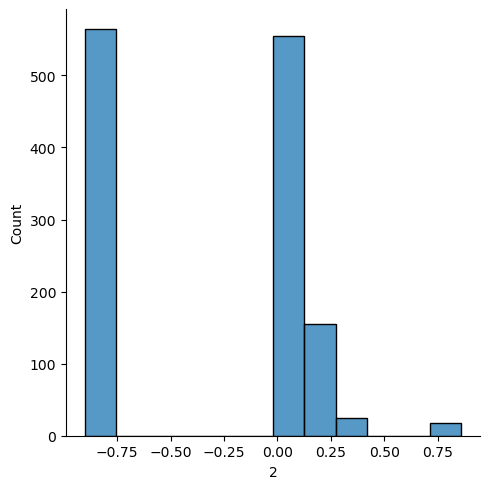

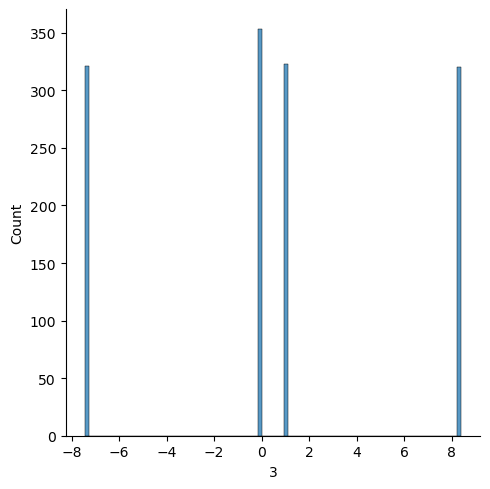

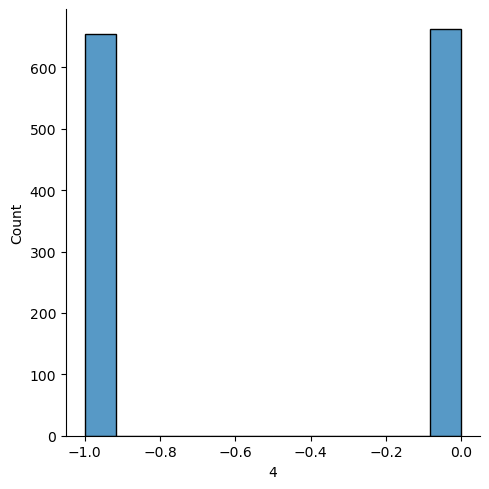

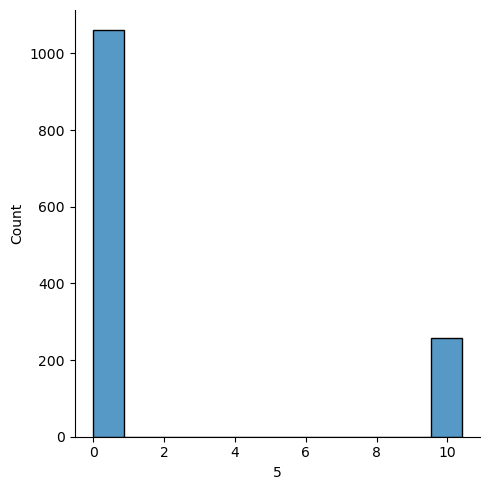

In [102]:
for i in x_scaled1.columns:
    sns.displot(data = x_scaled1, x = x_scaled1[i], kind ='hist')

In [103]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled1, y, test_size = 0.20, random_state = 48)

# linear Regression

In [104]:

lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [105]:
pre_train = lm.predict(x_train)

In [106]:
score = r2_score(pre_train, y_train)
score

0.5757905313857579

In [107]:
y_test_p = lm.predict(x_test)

In [108]:
score = r2_score(y_test_p, y_test)
score

0.6493606076902325

<AxesSubplot:xlabel='predicted', ylabel='Actual'>

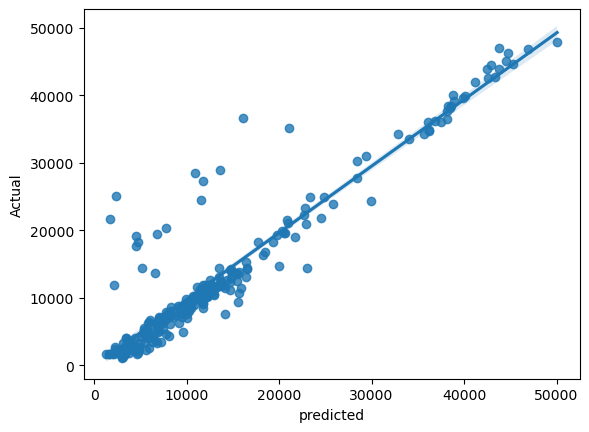

In [148]:
c = pd.DataFrame({'predicted': y_test_p, 'Actual': y_test})
sns.regplot(data=c, x='predicted', y='Actual')

# Radom Forest Regressor

In [109]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score

In [110]:
Classifier = RandomForestRegressor()

In [111]:
Classifier.fit(x_train, y_train)

RandomForestRegressor()

In [112]:
Y_pre_train = Classifier.predict(x_train)

In [113]:
score = r2_score(Y_pre_train, y_train )*100
score

97.01783705743848

<AxesSubplot:xlabel='predicted', ylabel='Actual'>

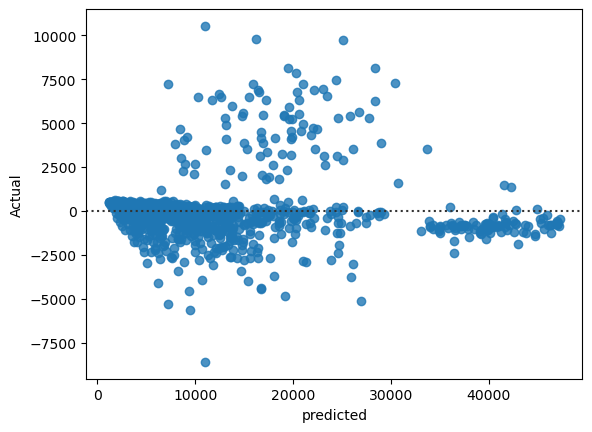

In [131]:
a = pd.DataFrame({'predicted': Y_pre_train, 'Actual': y_train})
sns.residplot(data=a, x='predicted', y='Actual')

In [120]:
pre_test = Classifier.predict(x_test)


In [121]:
score = r2_score(pre_test, y_test)*100
score

84.45538780346206

In [126]:
a1 = pd.DataFrame({'predicted': pre_test, 'Actual': y_test})

In [127]:
a1

,predicted,Actual
930,4843.440701,2927.06470
665,42626.480906,42560.43040
1111,41256.775773,41949.24410
329,10940.332401,9144.56500
1143,11696.856288,6338.07560
...,...,...
230,7624.121347,7443.64305
152,7930.111597,6334.34355
11,28867.526042,27808.72510
323,16035.028643,11566.30055


<AxesSubplot:xlabel='predicted', ylabel='Actual'>

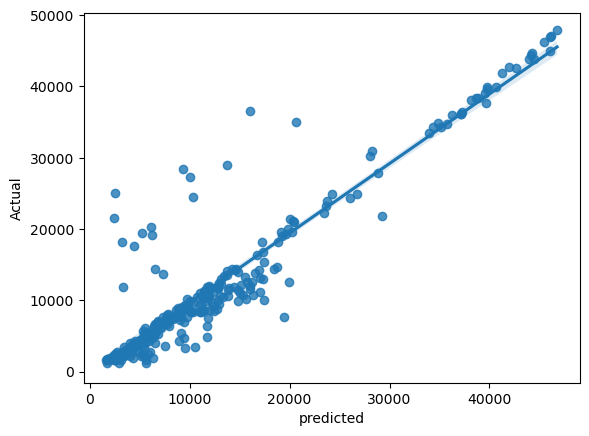

In [128]:
sns.regplot(data=a1, x='predicted', y='Actual')

<AxesSubplot:xlabel='predicted', ylabel='Actual'>

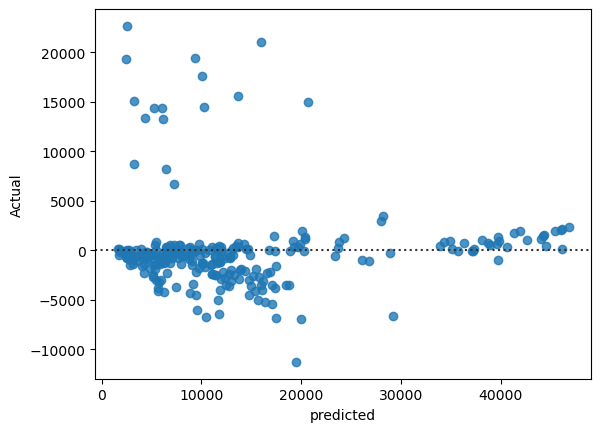

In [130]:
sns.residplot(data=a1, x='predicted', y='Actual')

In [134]:
from sklearn.ensemble import GradientBoostingRegressor

In [139]:
gradient = GradientBoostingRegressor()

In [140]:
gradient.fit(x_train, y_train)

GradientBoostingRegressor()

In [141]:
Y_pre_train = gradient.predict(x_train)

In [142]:
score = r2_score(Y_pre_train, y_train)
score

0.8734220113959363

In [143]:
y_test_p = gradient.predict(x_test)

In [144]:
score = r2_score(y_test_p, y_test)
score

0.8625919254882071

<AxesSubplot:xlabel='predicted', ylabel='Actual'>

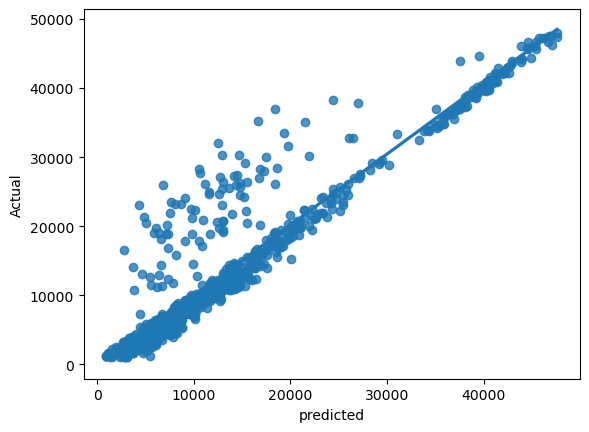

In [146]:
b = pd.DataFrame({'predicted': Y_pre_train, 'Actual': y_train})
sns.regplot(data=b, x='predicted', y='Actual')

<AxesSubplot:xlabel='predicted', ylabel='Actual'>

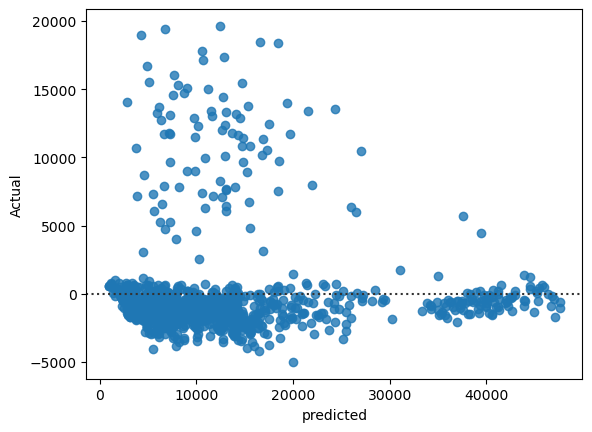

In [147]:
b = pd.DataFrame({'predicted': Y_pre_train, 'Actual': y_train})
sns.residplot(data=b, x='predicted', y='Actual')